### 0.Librairies

In [1]:
# Step 1: Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

### 1. Loading Data

In [2]:
# Step 2: Generate the dataset
os.chdir('C:/Users/Simplonco/Documents/jupyter-notebook/datasets')
data = pd.read_table('heart.txt')

In [3]:
# Step 3: Make Copy
df = data.copy()
df

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140,268,A,C,160,non,36,3,C,presence
266,62,masculin,130,231,A,A,146,non,18,2,D,absence
267,64,masculin,110,211,A,C,144,oui,18,2,A,absence
268,63,feminin,150,407,A,C,154,non,40,2,D,presence


### 1.1 Exploration Data Analysis

In [4]:
# Setp 3.1: Informations about df
df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         270 non-null    int64 
 1   sexe        270 non-null    object
 2   pression    270 non-null    int64 
 3   cholester   270 non-null    int64 
 4   sucre       270 non-null    object
 5   electro     270 non-null    object
 6   taux_max    270 non-null    int64 
 7   angine      270 non-null    object
 8   depression  270 non-null    int64 
 9   pic         270 non-null    int64 
 10  vaisseau    270 non-null    object
 11  coeur       270 non-null    object
dtypes: int64(6), object(6)
memory usage: 25.4+ KB


,sexe,sucre,electro,angine,vaisseau,coeur
count,270,270,270,270,270,270
unique,2,2,3,2,4,2
top,masculin,A,C,non,A,absence
freq,183,230,137,181,160,150


In [5]:
df.describe(include=np.number)

,age,pression,cholester,taux_max,depression,pic
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,10.500000,1.585185
std,9.109067,17.861608,51.686237,23.165717,11.452098,0.614390
min,29.000000,94.000000,126.000000,71.000000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,8.000000,2.000000
75%,61.000000,140.000000,280.000000,166.000000,16.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,62.000000,3.000000


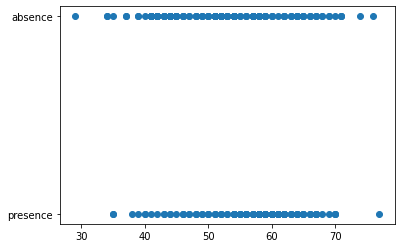

In [6]:
plt.scatter(df.age, df.coeur)

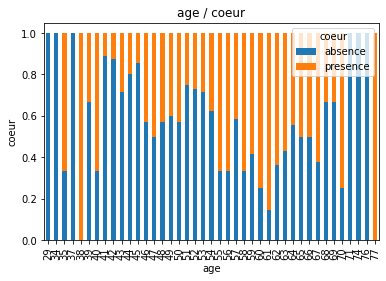

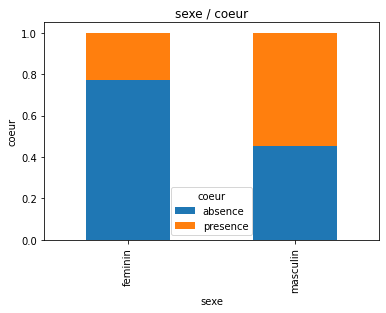

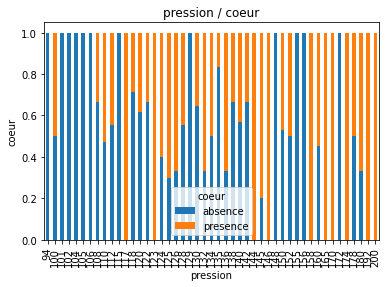

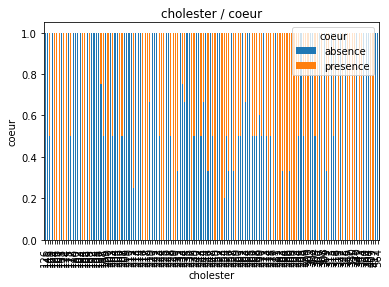

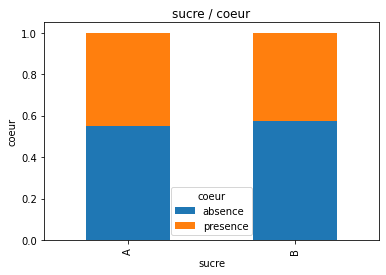

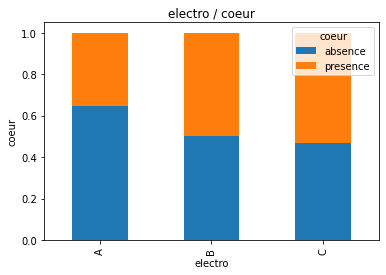

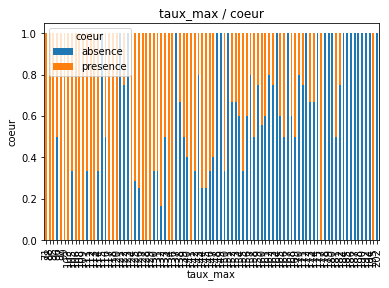

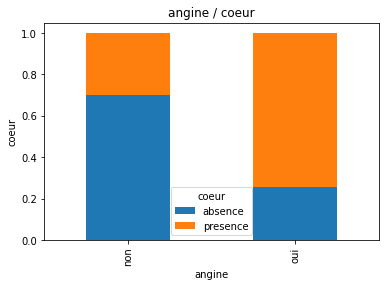

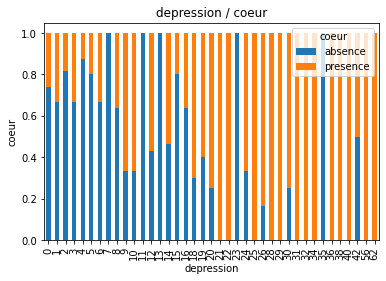

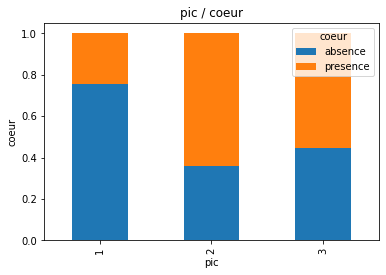

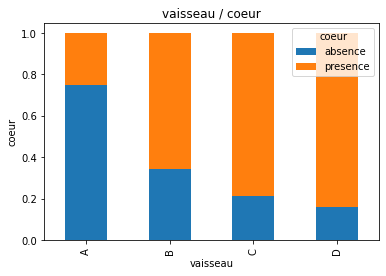

In [7]:
# Inflence des variables independantes sur la variable cible
var = ['age', 'sexe', 'pression', 'cholester', 'sucre', 'electro',
       'taux_max', 'angine', 'depression', 'pic', 'vaisseau']
for col in var:
    table = pd.crosstab(df[col], df['coeur'])
    table.div(table.sum(axis='columns').astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(str(col) + ' / coeur')
    plt.xlabel(str(col))
    plt.ylabel('coeur')

### 2. PréProcessing

In [8]:
# Step 3: Séparate qualitatif and quantitatif features
def sep_quanti_quali(data):
    quali_var = []
    quanti_var = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            quali_var.append(i)
        else:
            quanti_var.append(i)
    return print(f'variables_qualitatives = {quali_var},variables_quantitatives = {quanti_var}') 
# retouner le resultat du return pour d'autres fonction -- pipeline

In [9]:
sep_quanti_quali(df)

variables_qualitatives = ['sexe', 'sucre', 'electro', 'angine', 'vaisseau', 'coeur'],variables_quantitatives = ['age', 'pression', 'cholester', 'taux_max', 'depression', 'pic']


In [10]:
# drop sucre column car la variable sucre n'influence pas la variable cible
df.drop(['sucre'], axis='columns', inplace=True)
df

,age,sexe,pression,cholester,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,156,non,1,1,B,presence
1,41,feminin,130,204,C,172,non,14,1,A,absence
2,58,masculin,150,270,C,111,oui,8,1,A,presence
3,53,masculin,140,203,C,155,oui,31,3,A,presence
4,41,masculin,130,214,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140,268,C,160,non,36,3,C,presence
266,62,masculin,130,231,A,146,non,18,2,D,absence
267,64,masculin,110,211,C,144,oui,18,2,A,absence
268,63,feminin,150,407,C,154,non,40,2,D,presence


In [11]:
# Step 4: Split the DataSet
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [12]:
trainset['coeur'].value_counts() #80%

absence     113
presence    103
Name: coeur, dtype: int64

In [13]:
testset['coeur'].value_counts() #20%

absence     37
presence    17
Name: coeur, dtype: int64

In [14]:
# Quelles sont les modalités des différentes variables ?
var_quali_rev= ['sexe', 'electro', 'angine', 'vaisseau', 'coeur']
for col in var_quali_rev:
    print(df[col].value_counts().index) 

Index(['masculin', 'feminin'], dtype='object')
Index(['C', 'A', 'B'], dtype='object')
Index(['non', 'oui'], dtype='object')
Index(['A', 'B', 'C', 'D'], dtype='object')
Index(['absence', 'presence'], dtype='object')


In [15]:
# function of transformation
def encodage(df):
    code = {'masculin':0,
            'feminin':1,
            'A':0,
            'B':1,
            'C':2,
            'D':3,
            'oui':0,
            'non':1,
            'absence':0,
            'presence':1
           }
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [16]:
# split X, y in trainset and testset
def preprocessing(df):
    
    df = encodage(df)
    
    X = df.drop('coeur', axis='columns')
    y = df['coeur']
    
    #print(y.value_counts())
    
    return X, y

In [17]:
preprocessing(df)

(     age  sexe  pression  cholester  electro  taux_max  angine  depression  \
 0     58     0       100        234        0       156       1           1   
 1     41     1       130        204        2       172       1          14   
 2     58     0       150        270        2       111       0           8   
 3     53     0       140        203        2       155       0          31   
 4     41     0       130        214        2       168       1          20   
 ..   ...   ...       ...        ...      ...       ...     ...         ...   
 265   62     1       140        268        2       160       1          36   
 266   62     0       130        231        0       146       1          18   
 267   64     0       110        211        2       144       0          18   
 268   63     1       150        407        2       154       1          40   
 269   35     1       138        183        0       182       1          14   
 
      pic  vaisseau  
 0      1         1  
 1    

In [18]:
X_train, y_train = preprocessing(trainset)
X_train
#y_train

,age,sexe,pression,cholester,electro,taux_max,angine,depression,pic,vaisseau
5,65,1,155,269,0,148,1,8,1,0
22,35,0,126,282,2,156,0,0,1,0
196,53,1,138,234,2,160,1,0,1,0
110,51,0,100,222,0,143,0,12,2,0
12,45,1,130,234,2,175,1,6,2,0
...,...,...,...,...,...,...,...,...,...,...
251,49,0,120,188,0,139,1,20,2,3
192,49,0,130,266,0,171,1,6,1,0
117,70,0,145,174,0,125,0,26,3,0
47,48,0,124,255,0,175,1,0,1,2


In [19]:
X_test, y_test = preprocessing(testset)
#X_test
#y_test

In [20]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_test,X_train

(array([[-0.91618427, -0.66332496,  0.49998499,  1.24750924, -1.08208202,
         -1.26314492, -1.42907436,  0.63572002,  0.66881969,  1.37818618],
        [ 0.79812696,  1.50755672,  0.38576314,  0.91597172, -1.08208202,
         -1.86477513,  0.69975365,  0.72368641,  0.66881969,  2.42638411],
        [ 0.69098251,  1.50755672,  0.78553961,  1.16950041,  0.93282933,
         -0.14583166, -1.42907436, -0.06801105,  0.66881969, -0.7182097 ],
        [-1.13047318, -0.66332496, -0.64223349,  0.3114033 , -1.08208202,
          1.01445518,  0.69975365, -0.94767488, -0.97282864, -0.7182097 ],
        [-0.38046201, -0.66332496,  0.49998499,  1.01348275, -1.08208202,
          1.01445518, -1.42907436,  0.45978726, -0.97282864, -0.7182097 ],
        [-0.05902866, -0.66332496, -1.32756458,  1.20850482, -1.08208202,
          0.28390421,  0.69975365, -0.94767488, -0.97282864, -0.7182097 ],
        [-1.77333989, -0.66332496, -0.64223349, -0.31266733, -1.08208202,
          1.40121746, -1.4290743

### 3. Modelisation

In [22]:
# Step 5: Perform Logistic Regression / buid model
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [23]:
# Step 6: Make prediction using the Model
# Perform prediction using the test dataset
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [24]:
# prediction with new individual
var = [24,0,120,250,1,150,1,15,2,1]
x_predict = sc.transform([var])
classifier.predict(x_predict)

array([1], dtype=int64)

### 4. Evaluation

In [25]:
#Evaluation (Performance du modèle)
s = classifier.score(X_test,y_test)
print(f'Le score du model est :{s}')

Le score du model est :0.8518518518518519


In [26]:
# Step 7 : Display mertics
#**Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)
#print(cm) #total=37

,0,1
0,31,6
1,2,15


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.71      0.88      0.79        17

    accuracy                           0.85        54
   macro avg       0.83      0.86      0.84        54
weighted avg       0.87      0.85      0.86        54



In [28]:
def taux_erreur(x1, x2):
    contingence = pd.crosstab(x1, x2)
    N = contingence.sum().sum()
    Num = contingence.iloc[1, 0] + contingence.iloc[0, 1]
    return round(Num/N * 100, 2)

In [29]:
taux_erreur(y_test, y_pred)

14.81

- Vrais négatifs: négatifs correctement prédits (zéros)
- Vrais positifs: positifs correctement prédits (uns)
- Faux négatifs: négatifs incorrectement prévus (zéros)
- Faux positifs: positifs imprévus (uns)

Vous évaluez généralement les performances de votre classificateur en comparant les sorties réelles et prévues et en comptant les prédictions correctes et incorrectes.

L'indicateur ``le plus simple de précision de la classification est le rapport du nombre de prédictions correctes au nombre total de prédictions``(ou observations). Les autres indicateurs des classificateurs binaires sont les suivants:

- La valeur prédictive positive est le rapport entre le nombre de vrais positifs et la somme des nombres de vrais et faux positifs.
- La valeur prédictive négative est le rapport du nombre de vrais négatifs à la somme des nombres de vrais et de faux négatifs.
- La sensibilité (également connu sous le nom de taux de rappel ou de vrai positif) est le rapport entre le nombre de vrais positifs et le nombre de positifs réels.
- La spécificité (ou vrai taux négatif) est le rapport entre le nombre de vrais négatifs et le nombre de négatifs réels.

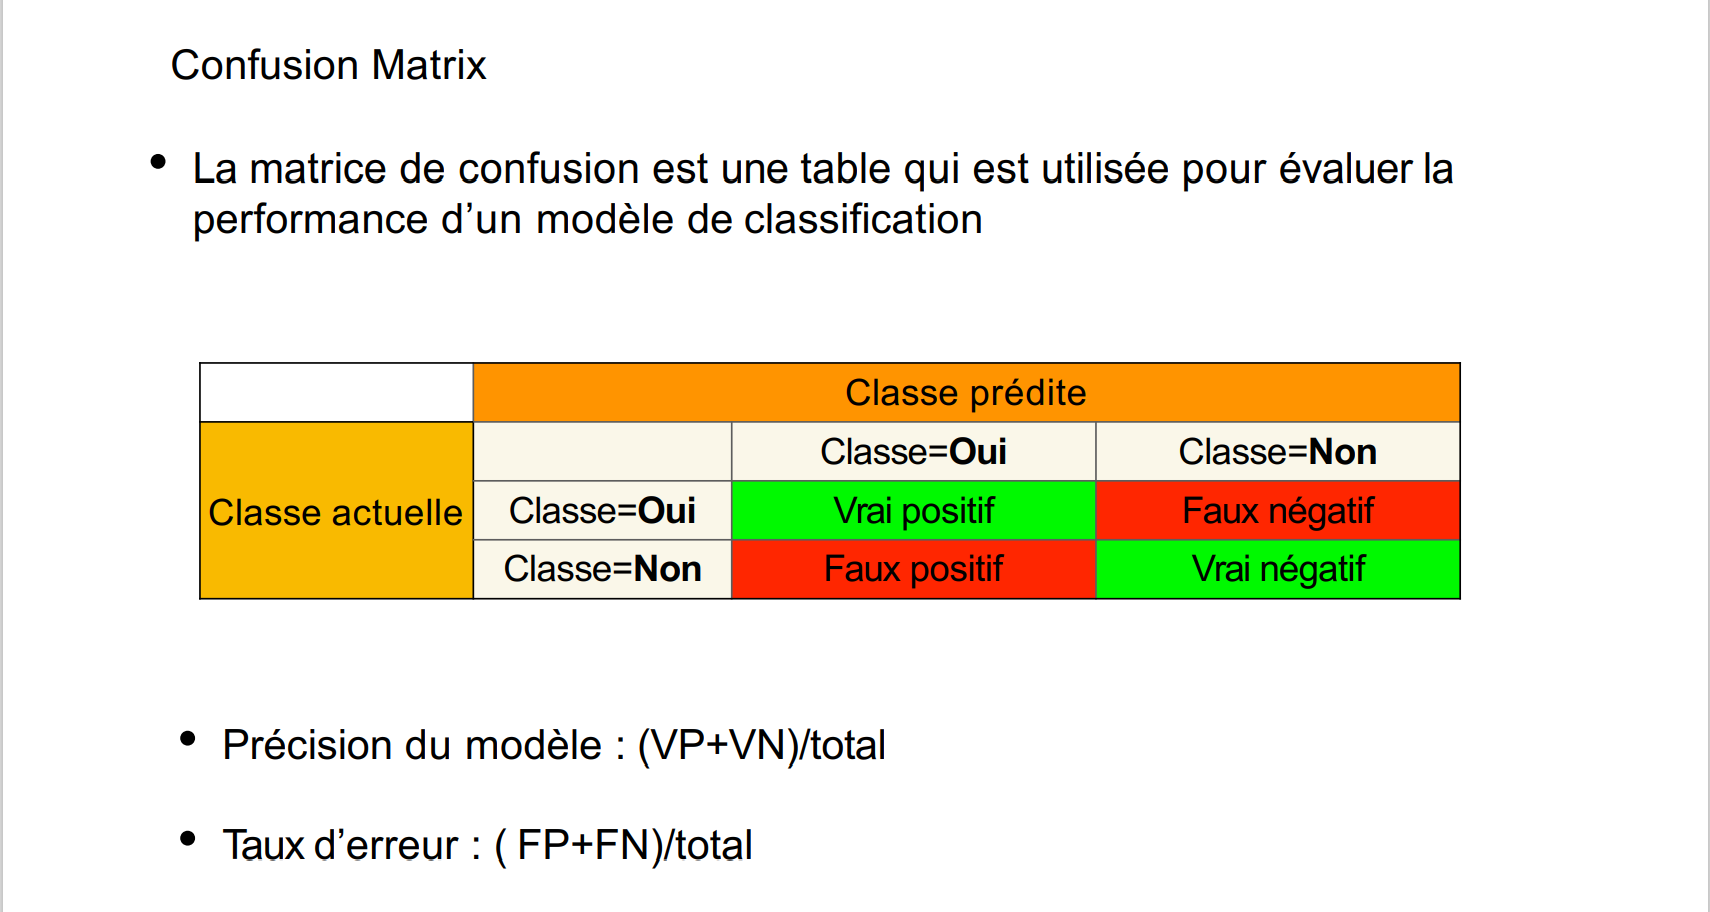

In [30]:
os.getcwd()
os.chdir('C:/Users/Simplonco/Downloads/')
Image("Capture1.PNG")